<a href="https://colab.research.google.com/github/keinerfan/CIAP1/blob/CODES/IAP1_svr_morgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib.pyplot import plot, xlabel, ylabel, show
import matplotlib.pyplot as plt  # Importing plt for show() function
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Load the dataset

data = pd.read_csv('https://raw.githubusercontent.com/keinerfan/CIAP1/DATA-SETS/IAP1_06_morgan_fp.csv')


y = data.pIC50.values.reshape((-1,1))
data = data.drop(['pIC50'] , axis = 1 )

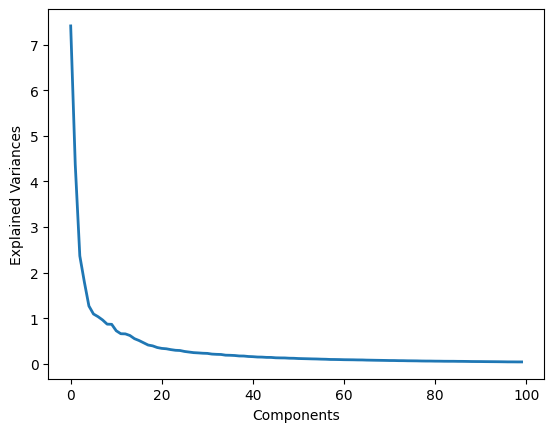

In [ ]:

pca = PCA(n_components=100).fit(data)
plot(pca.explained_variance_, linewidth=2)
xlabel('Components')
ylabel('Explained Variances')  # Corrected spelling
plt.show()  # Corrected function call


In [ ]:
pca = PCA(n_components= 75)
pca.fit(data)
merged_data  = pca.transform(data)

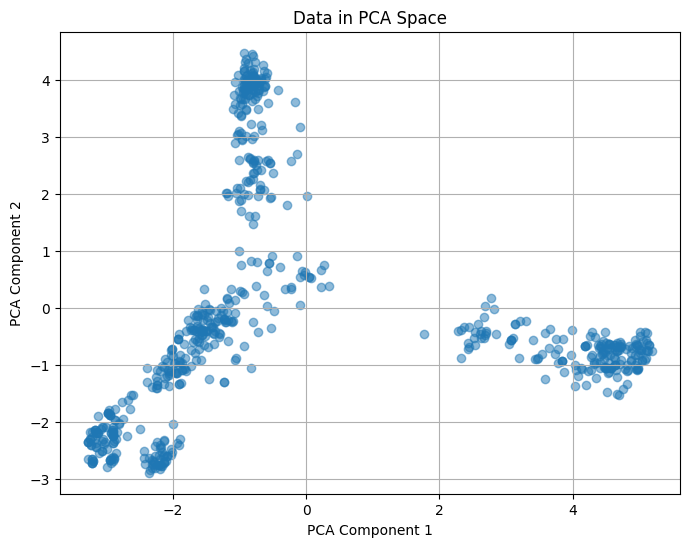

In [ ]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(8, 6))
plt.scatter(merged_data[:, 0], merged_data[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Data in PCA Space')
plt.grid(True)
plt.show()

# **hyper tunning svr**

array([6.24412514, 5.38721614, 5.55284197, ..., 8.86966623, 8.21609642,
       8.77989191])

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


yc = y.ravel()

# Define pipeline with SVR
pipeline = SVR()


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_data, yc, test_size=0.2, random_state=0)

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']

}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scal

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVR Train Set Metrics:
Mean Squared Error: 0.11187385981598597
R2 Score: 0.888126140184014


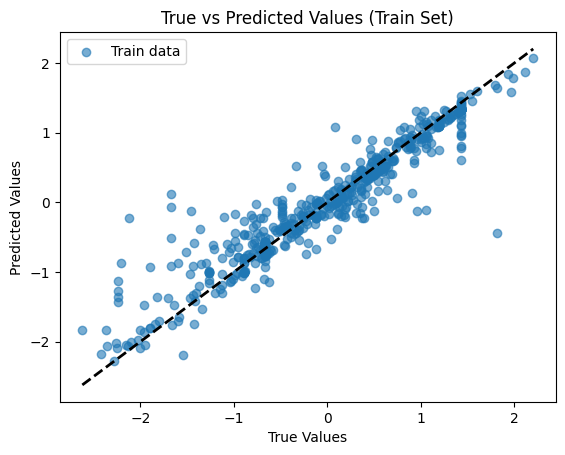


SVR Test Set Metrics:
Mean Squared Error: 0.16202760839668978
R2 Score: 0.8585446225942542


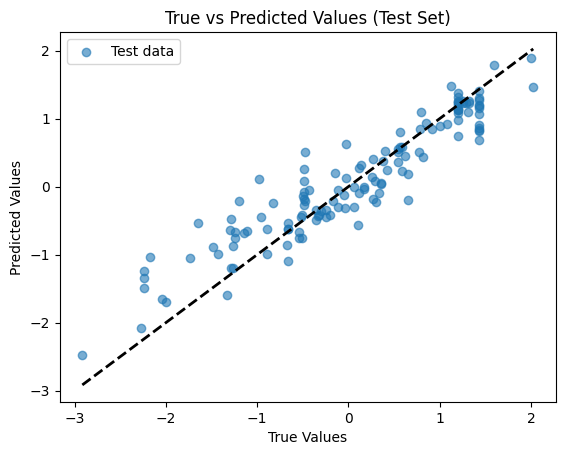

In [12]:

# Train the best model on the training set
best_model.fit(X_train, y_train)

# Predictions and metrics for training set
predicted_labels_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, predicted_labels_train)
r2_train = r2_score(y_train, predicted_labels_train)
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("SVR Train Set Metrics:")
print("Mean Squared Error:", mse_train)
print("R2 Score:", r2_train)

# Plot true vs. predicted values for training set
plt.figure()
plt.scatter(y_train, predicted_labels_train, label='Train data', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Train Set)')
plt.legend()
plt.show()

# Predictions and metrics for test set
predicted_labels_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, predicted_labels_test)
r2_test = r2_score(y_test, predicted_labels_test)

print("\nSVR Test Set Metrics:")
print("Mean Squared Error:", mse_test)
print("R2 Score:", r2_test)

# Plot true vs. predicted values for test set
plt.figure()
plt.scatter(y_test, predicted_labels_test, label='Test data', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Test Set)')
plt.legend()
plt.show()

# **internal KFOLD cross validation with 5 folds**

# **Saving the model **

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the SVR model
model = SVR(kernel='rbf', C=1, epsilon=0.2, gamma='scale')

# Number of splits for KFold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

# Initialize lists to store evaluation metrics for each fold
metrics = {
    'Fold': [],
    'Train R2': [],
    'Train MSE': [],
    'Train MAE': [],
    'Train MAPE': [],
    'Test R2': [],
    'Test MSE': [],
    'Test MAE': [],
    'Test MAPE': []
}

# Iterate over different folds
for fold, (train_index, test_index) in enumerate(kf.split(merged_data), 1):
    X_train, X_test = merged_data[train_index], merged_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate evaluation metrics for this fold
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # Append metrics for this fold to the metrics dictionary
    metrics['Fold'].append(fold)
    metrics['Train R2'].append(train_r2)
    metrics['Train MSE'].append(train_mse)
    metrics['Train MAE'].append(train_mae)
    metrics['Train MAPE'].append(train_mape)
    metrics['Test R2'].append(test_r2)
    metrics['Test MSE'].append(test_mse)
    metrics['Test MAE'].append(test_mae)
    metrics['Test MAPE'].append(test_mape)

    # Print metrics for training set
    print(f"======== Fold {fold} ======")
    print("Training Set Metrics:")
    print(f'R-Squared: {train_r2}')
    print(f'Mean Squared Error (MSE): {train_mse}')
    print(f'Mean Absolute Error (MAE): {train_mae}')
    print(f'Mean Absolute Percentage Error (MAPE): {train_mape}')

    # Print metrics for testing set
    print("\nTesting Set Metrics:")
    print(f'R-Squared: {test_r2}')
    print(f'Mean Squared Error (MSE): {test_mse}')
    print(f'Mean Absolute Error (MAE): {test_mae}')
    print(f'Mean Absolute Percentage Error (MAPE): {test_mape}')

# Calculate averages for each metric
average_metrics = {
    'Fold': ['Average'],
    'Train R2': [np.mean(metrics['Train R2'])],
    'Train MSE': [np.mean(metrics['Train MSE'])],
    'Train MAE': [np.mean(metrics['Train MAE'])],
    'Train MAPE': [np.mean(metrics['Train MAPE'])],
    'Test R2': [np.mean(metrics['Test R2'])],
    'Test MSE': [np.mean(metrics['Test MSE'])],
    'Test MAE': [np.mean(metrics['Test MAE'])],
    'Test MAPE': [np.mean(metrics['Test MAPE'])]
}

# Append average metrics to the metrics dictionary
for key in metrics.keys():
    metrics[key].append(average_metrics[key][0])

# Convert metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Export the DataFrame to a CSV file
metrics_df.to_csv('k_fold_metrics.csv', index=False)

print("\nMetrics and averages have been saved to 'k_fold_metrics.csv'")
metrics


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 1 ======
Training Set Metrics:
R-Squared: 0.8821328694679921
Mean Squared Error (MSE): 0.2077457939114756
Mean Absolute Error (MAE): 0.30490882807900915
Mean Absolute Percentage Error (MAPE): 21.37403833055017

Testing Set Metrics:
R-Squared: 0.7734635918983037
Mean Squared Error (MSE): 0.34899602775271954
Mean Absolute Error (MAE): 0.43416523309368066
Mean Absolute Percentage Error (MAPE): 19.049651396755095
======== Fold 2 ======
Training Set Metrics:
R-Squared: 0.9013069690857252
Mean Squared Error (MSE): 0.17010840903156624
Mean Absolute Error (MAE): 0.2928632253788859
Mean Absolute Percentage Error (MAPE): 20.94664707655802

Testing Set Metrics:
R-Squared: 0.7218300125661876
Mean Squared Error (MSE): 0.4620598779741426
Mean Absolute Error (MAE): 0.46324275405052895
Mean Absolute Percentage Error (MAPE): 21.513419273478732
======== Fold 3 ======
Training Set Metrics:
R-Squared: 0.888397730305462
Mean Squared Error (MSE): 0.18854044657043273
Mean Absolute Error (MAE): 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


======== Fold 4 ======
Training Set Metrics:
R-Squared: 0.8752656384289027
Mean Squared Error (MSE): 0.21723884045022088
Mean Absolute Error (MAE): 0.31652731246673704
Mean Absolute Percentage Error (MAPE): 21.248734519632865

Testing Set Metrics:
R-Squared: 0.8307687972650128
Mean Squared Error (MSE): 0.26819748732954823
Mean Absolute Error (MAE): 0.3566594030612234
Mean Absolute Percentage Error (MAPE): 19.204324719594002
======== Fold 5 ======
Training Set Metrics:
R-Squared: 0.8735663913924139
Mean Squared Error (MSE): 0.2110031407780147
Mean Absolute Error (MAE): 0.3088080204170596
Mean Absolute Percentage Error (MAPE): 20.574467075845725

Testing Set Metrics:
R-Squared: 0.8494219383843307
Mean Squared Error (MSE): 0.2878443096458464
Mean Absolute Error (MAE): 0.4123308480937703
Mean Absolute Percentage Error (MAPE): 21.580226288437515

Metrics and averages have been saved to 'k_fold_metrics.csv'
